# import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from nltk.tokenize import word_tokenize
import re
import nltk



In [ ]:
import numpy as np
import pandas as pd
from gensim.models.word2vec import Word2Vec
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
# nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import re
import string
import os
from collections import defaultdict
from collections import Counter

nltk.download('stopwords')
plt.style.use('ggplot')
stop = set(stopwords.words('english'))

import gensim
from tqdm.notebook import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/AI LAB/train.csv')



In [ ]:
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
len(dataset)

7613

In [ ]:
null_counts = dataset.isnull().sum()
print(null_counts)

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [ ]:
def two_word_frequency(dataset, n=10):
    vector = CountVectorizer(ngram_range=(2, 2)).fit(dataset)
    bag_of_words = vector.transform(dataset)
    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

    return words_freq[:n]

<Axes: >

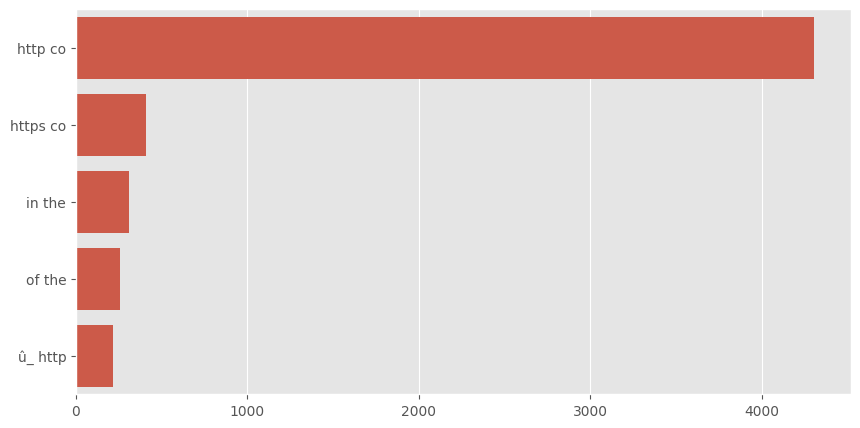

In [ ]:
plt.figure(figsize=(10, 5))
two_word = two_word_frequency(dataset['text'])[:5]

x, y = map(list, zip(*two_word))

sns.barplot(x=y, y=x)

# Data cleaning

In [ ]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    print(url)

    return url.sub('', text)


In [ ]:
def remove_html(text):
    html = re.compile(r'<.*?>')

    return html.sub('', text)


In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

In [ ]:
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)

    return text.translate(table)

In [ ]:
dataset['text'] = dataset['text'].apply(lambda x: remove_emoji(x))
dataset['text'] = dataset['text'].apply(lambda x: remove_html(x))
dataset['text'] = dataset['text'].apply(lambda x: remove_URL(x))
dataset['text'] = dataset['text'].apply(lambda x: remove_punct(x))

串流輸出內容已截斷至最後 5000 行。
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.compile('https?://\\S+|www\\.\\S+')
re.c

In [ ]:
dataset['text']

,text
0,Our Deeds are the Reason of this earthquake Ma...
1,Forest fire near La Ronge Sask Canada
2,All residents asked to shelter in place are be...
3,13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby Alaska as s...
...,...
7608,Two giant cranes holding a bridge collapse int...
7609,ariaahrary TheTawniest The out of control wild...
7610,M194 0104 UTC5km S of Volcano Hawaii
7611,Police investigating after an ebike collided w...


In [ ]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
print(nltk.word_tokenize(dataset.loc[0,'text']))
dataset['tokenized_text'] = dataset['text'].apply(lambda x: nltk.word_tokenize(x))
dataset['tokenized_text']

['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all']


,tokenized_text
0,"[Our, Deeds, are, the, Reason, of, this, earth..."
1,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,"[All, residents, asked, to, shelter, in, place..."
3,"[13000, people, receive, wildfires, evacuation..."
4,"[Just, got, sent, this, photo, from, Ruby, Ala..."
...,...
7608,"[Two, giant, cranes, holding, a, bridge, colla..."
7609,"[ariaahrary, TheTawniest, The, out, of, contro..."
7610,"[M194, 0104, UTC5km, S, of, Volcano, Hawaii]"
7611,"[Police, investigating, after, an, ebike, coll..."


In [ ]:
from nltk.corpus import stopwords
stopword = stopwords.words('english')
print(stopword[1:50])

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be']


In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

In [ ]:
dataset['tokenized_text_remove_stopword'] = dataset['tokenized_text'].apply(lambda x: remove_stopwords(x))

# print(result[1:50])

In [ ]:
dataset.loc[0,'tokenized_text_remove_stopword']

['Our', 'Deeds', 'Reason', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us']

# word2vec

In [ ]:
import pandas as pd
from gensim.models.word2vec import Word2Vec

In [ ]:
w2v_model = Word2Vec(dataset['tokenized_text_remove_stopword'])

In [ ]:
def most_similar(w2v_model, words, topn=10):
    similar_df = pd.DataFrame()
    for word in words:
        try:
            similar_words = pd.DataFrame(w2v_model.wv.most_similar(word, topn=topn), columns=[word, 'cos'])
            similar_df = pd.concat([similar_df, similar_words], axis=1)
        except:
            print(word, "not found in Word2Vec model!")
    return similar_df

In [ ]:
most_similar(w2v_model, ['fire'])

,fire,cos
0,like,0.999780
1,people,0.999754
2,2,0.999746
3,amp,0.999741
4,The,0.999732
5,My,0.999694
6,I,0.999694
7,A,0.999684
8,via,0.999684
9,one,0.999674


In [ ]:
vector_size = w2v_model.vector_size
print("Word2Vec embedding dimension:", vector_size)

Word2Vec embedding dimension: 100


In [ ]:
word2vec_vectors = w2v_model.wv.vectors
print(word2vec_vectors.shape)

(3042, 100)


# embadding

In [ ]:
embedding_matrix = np.zeros((len(w2v_model.wv.key_to_index) + 1, w2v_model.vector_size))
word2idx = {}

vocab_list = [(word, w2v_model.wv[word]) for word in w2v_model.wv.index_to_key]
for i, vocab in enumerate(vocab_list):
    word, vec = vocab
    word2idx[word] = i + 1
    # embedding_matrix[i + 1] = vec

In [ ]:
embedding_layer = Embedding(input_dim=embedding_matrix.shape[0],
                            output_dim=embedding_matrix.shape[1],
                            weights=[embedding_matrix],
                            trainable=False)

In [ ]:
from keras.preprocessing.sequence import pad_sequences
import numpy as np

def text_to_index(corpus, word2idx):
    new_corpus = []
    for doc in corpus:
        new_doc = []
        for word in doc:
            try:
                new_doc.append(word2idx[word])
            except KeyError:
                new_doc.append(0)  # Use 0 for words not found in the vocabulary
        new_corpus.append(new_doc)
    return new_corpus

PADDING_LENGTH = 200
X = text_to_index(dataset['tokenized_text'], word2idx)
X = pad_sequences(X, maxlen=PADDING_LENGTH)

print("Shape:", X.shape)
print("Sample:", X[0])


Shape: (7613, 200)
Sample: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0  491    0    0    0 3035

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, dataset['target'], test_size=0.2, random_state=42)

# LSTM - test

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader



class BinaryLSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, padding_idx):
        super(BinaryLSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_idx)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        lstm_out = self.dropout(lstm_out)
        hidden_state = lstm_out[:, -1, :]
        output = self.fc(hidden_state)
        return self.sigmoid(output)

In [ ]:

X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:

EMBEDDING_DIM = 300
HIDDEN_DIM = 256
VOCAB_SIZE = len(word2idx) + 1
PADDING_IDX = word2idx.get('<PAD>', 0)

model = BinaryLSTMClassifier(EMBEDDING_DIM, HIDDEN_DIM, VOCAB_SIZE, PADDING_IDX)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)


In [ ]:

model = BinaryLSTMClassifier(EMBEDDING_DIM, HIDDEN_DIM, VOCAB_SIZE, PADDING_IDX)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)


patience = 3
best_loss = float('inf')
patience_counter = 0


num_epochs = 20
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []


for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted_labels = (predictions >= 0.5).float()
        correct += (predicted_labels == y_batch).sum().item()
        total += y_batch.size(0)

    train_losses.append(total_loss / len(train_loader))
    train_accuracies.append(correct / total)

    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            total_loss += loss.item()
            predicted_labels = (predictions >= 0.5).float()
            correct += (predicted_labels == y_batch).sum().item()
            total += y_batch.size(0)

    test_losses.append(total_loss / len(test_loader))
    test_accuracies.append(correct / total)

    print(f"Epoch {epoch + 1}/{num_epochs} - "
          f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f} - "
          f"Test Loss: {test_losses[-1]:.4f}, Test Acc: {test_accuracies[-1]:.4f}")

    # Early Stopping
    if test_losses[-1] < best_loss:
        best_loss = test_losses[-1]
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break


Epoch 1/20 - Train Loss: 0.6789, Train Acc: 0.5880 - Test Loss: 0.6569, Test Acc: 0.6041
Epoch 2/20 - Train Loss: 0.6295, Train Acc: 0.6350 - Test Loss: 0.6086, Test Acc: 0.6737
Epoch 3/20 - Train Loss: 0.5713, Train Acc: 0.7179 - Test Loss: 0.5543, Test Acc: 0.7413
Epoch 4/20 - Train Loss: 0.4982, Train Acc: 0.7714 - Test Loss: 0.5173, Test Acc: 0.7584
Epoch 5/20 - Train Loss: 0.4432, Train Acc: 0.8038 - Test Loss: 0.5040, Test Acc: 0.7715
Epoch 6/20 - Train Loss: 0.3997, Train Acc: 0.8305 - Test Loss: 0.5000, Test Acc: 0.7774
Epoch 7/20 - Train Loss: 0.3638, Train Acc: 0.8509 - Test Loss: 0.5127, Test Acc: 0.7538
Epoch 8/20 - Train Loss: 0.3310, Train Acc: 0.8655 - Test Loss: 0.5222, Test Acc: 0.7774
Epoch 9/20 - Train Loss: 0.3067, Train Acc: 0.8773 - Test Loss: 0.5362, Test Acc: 0.7754
Early stopping triggered!


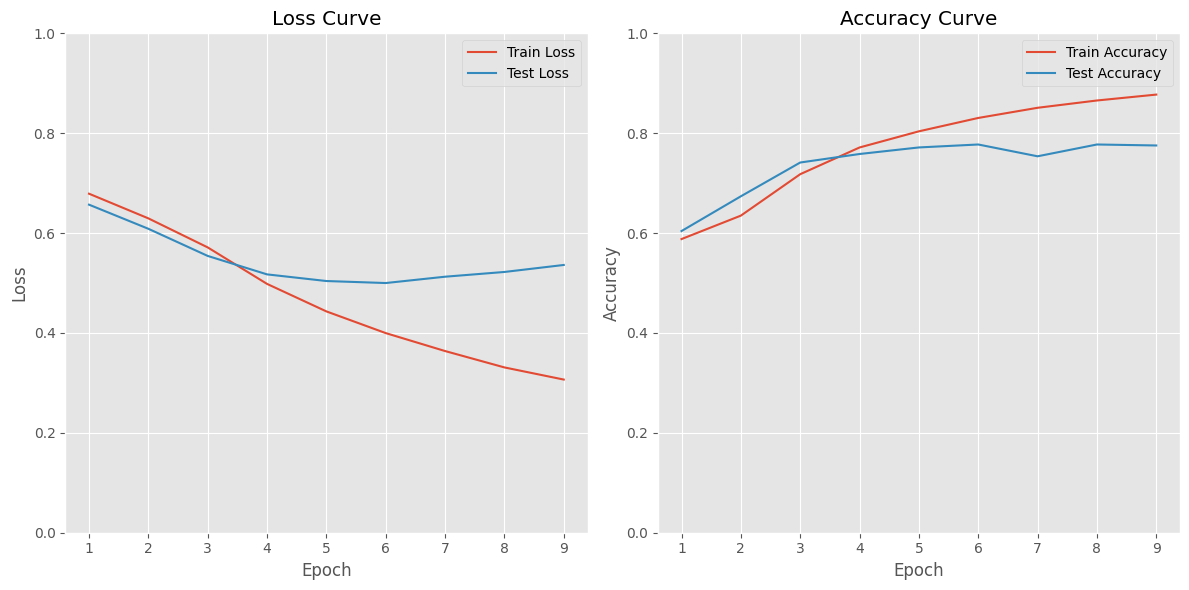

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 10), train_losses, label='Train Loss')
plt.plot(range(1, 10), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')


plt.subplot(1, 2, 2)
plt.plot(range(1, 10), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 10), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.title('Accuracy Curve')
plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()


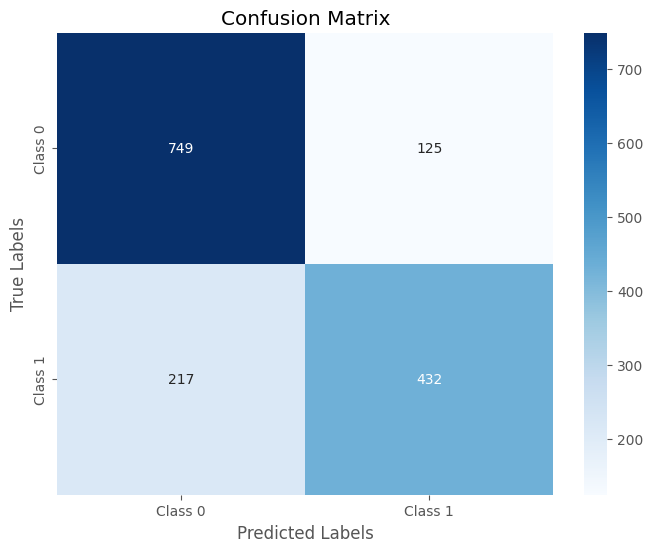

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 生成混淆矩陣
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        predictions = model(X_batch)
        predicted_labels = (predictions >= 0.5).float()
        y_true.extend(y_batch.view(-1).cpu().numpy())
        y_pred.extend(predicted_labels.view(-1).cpu().numpy())

conf_matrix = confusion_matrix(y_true, y_pred)

# 使用 Seaborn 繪製混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=["Class 0", "Class 1"])
print(report)

              precision    recall  f1-score   support

     Class 0       0.78      0.86      0.81       874
     Class 1       0.78      0.67      0.72       649

    accuracy                           0.78      1523
   macro avg       0.78      0.76      0.77      1523
weighted avg       0.78      0.78      0.77      1523



# GRU 改

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader



class BinaryGRUClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, padding_idx):
        super(BinaryGRUClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_idx)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        gru_out, _ = self.gru(embedded)
        gru_out = self.dropout(gru_out)
        hidden_state = gru_out[:, -1, :]
        output = self.fc(hidden_state)
        return self.sigmoid(output)

In [ ]:

X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:

EMBEDDING_DIM = 300
HIDDEN_DIM = 256
VOCAB_SIZE = len(word2idx) + 1
PADDING_IDX = word2idx.get('<PAD>', 0)

model = BinaryGRUClassifier(EMBEDDING_DIM, HIDDEN_DIM, VOCAB_SIZE, PADDING_IDX)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)


In [ ]:

model = BinaryGRUClassifier(EMBEDDING_DIM, HIDDEN_DIM, VOCAB_SIZE, PADDING_IDX)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)


patience = 3
best_loss = float('inf')
patience_counter = 0


num_epochs = 20
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []


for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted_labels = (predictions >= 0.5).float()
        correct += (predicted_labels == y_batch).sum().item()
        total += y_batch.size(0)

    train_losses.append(total_loss / len(train_loader))
    train_accuracies.append(correct / total)

    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            total_loss += loss.item()
            predicted_labels = (predictions >= 0.5).float()
            correct += (predicted_labels == y_batch).sum().item()
            total += y_batch.size(0)

    test_losses.append(total_loss / len(test_loader))
    test_accuracies.append(correct / total)

    print(f"Epoch {epoch + 1}/{num_epochs} - "
          f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f} - "
          f"Test Loss: {test_losses[-1]:.4f}, Test Acc: {test_accuracies[-1]:.4f}")

    # Early Stopping
    if test_losses[-1] < best_loss:
        best_loss = test_losses[-1]
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break


Epoch 1/20 - Train Loss: 0.6801, Train Acc: 0.5681 - Test Loss: 0.6613, Test Acc: 0.6225
Epoch 2/20 - Train Loss: 0.6244, Train Acc: 0.6514 - Test Loss: 0.6044, Test Acc: 0.6842
Epoch 3/20 - Train Loss: 0.5628, Train Acc: 0.7276 - Test Loss: 0.5542, Test Acc: 0.7209
Epoch 4/20 - Train Loss: 0.4979, Train Acc: 0.7721 - Test Loss: 0.5221, Test Acc: 0.7511
Epoch 5/20 - Train Loss: 0.4505, Train Acc: 0.8008 - Test Loss: 0.5013, Test Acc: 0.7643
Epoch 6/20 - Train Loss: 0.4072, Train Acc: 0.8230 - Test Loss: 0.4941, Test Acc: 0.7781
Epoch 7/20 - Train Loss: 0.3677, Train Acc: 0.8443 - Test Loss: 0.4982, Test Acc: 0.7879
Epoch 8/20 - Train Loss: 0.3408, Train Acc: 0.8576 - Test Loss: 0.5030, Test Acc: 0.7866
Epoch 9/20 - Train Loss: 0.3066, Train Acc: 0.8788 - Test Loss: 0.5199, Test Acc: 0.7859
Early stopping triggered!


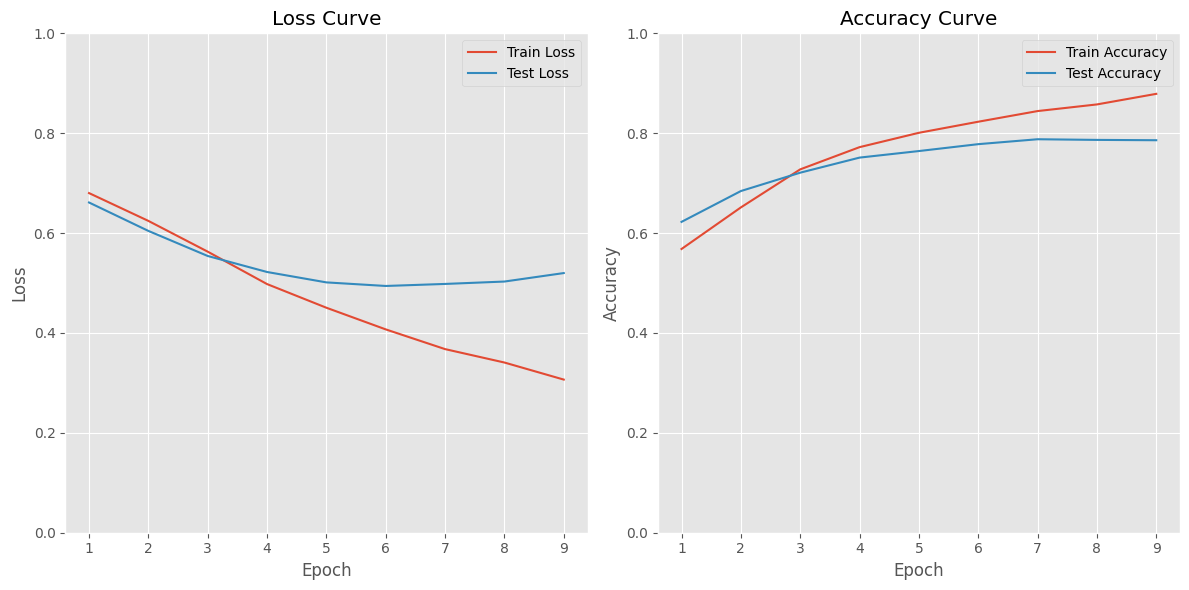

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 10), train_losses, label='Train Loss')
plt.plot(range(1, 10), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')


plt.subplot(1, 2, 2)
plt.plot(range(1, 10), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 10), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.title('Accuracy Curve')
plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()


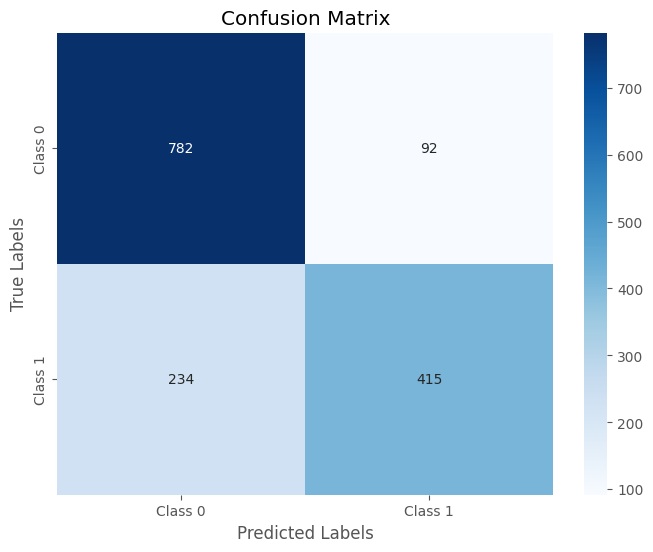

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 生成混淆矩陣
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        predictions = model(X_batch)
        predicted_labels = (predictions >= 0.5).float()
        y_true.extend(y_batch.view(-1).cpu().numpy())
        y_pred.extend(predicted_labels.view(-1).cpu().numpy())

conf_matrix = confusion_matrix(y_true, y_pred)

# 使用 Seaborn 繪製混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=["Class 0", "Class 1"])
print(report)

              precision    recall  f1-score   support

     Class 0       0.77      0.89      0.83       874
     Class 1       0.82      0.64      0.72       649

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.79      0.79      0.78      1523

